### Presentation
Dr. John Snow (1813-1858) was a famous British physician and is widely recognized as a legendary figure in the history of public health and a leading pioneer in the development of anesthesia. <br>

John Snow is now also recognized as one of the founders of modern epidemiology (some also consider him as the founder of data visualization, spatial analysis, data science in general, and many other related fields) for his scientific and pretty modern data approach in identifying the source of a cholera outbreak in Soho, London in 1854.<br>

In this notebook, we'll reanalyze the data he collected in 1854 and recreate his famous map (also called The Ghost Map). This project is an implementation based on case studies that can be found on the DataCamp platform.

In [1]:
import pandas as pd
import numpy as np
import folium
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Import data set
deaths = pd.read_csv(r'datasets\deaths.csv')
deaths.head()

,Death,X coordinate,Y coordinate
0,1,51.513418,-0.137930
1,1,51.513418,-0.137930
2,1,51.513418,-0.137930
3,1,51.513361,-0.137883
4,1,51.513361,-0.137883


### Data processing
Originally he formulated and published his theory that cholera is spread by water or food in an essay "On the Mode of Communication of Cholera".<br>
We know now that he was right, but Dr. Snow's dilemma was how to prove it? His first step to getting there was checking the data. Our dataset has 489 rows of data in 3 columns but to work with dataset more easily we will first make few changes. 

In [3]:
# Summary of our dataset
deaths.info()

# Rename the columns
cols_name = {'X coordinate':'x_latitude', 
             'Y coordinate':'y_longitude'}

deaths.rename(columns=cols_name, inplace=True)
deaths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
Death           489 non-null int64
X coordinate    489 non-null float64
Y coordinate    489 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.5 KB


,Death,x_latitude,y_longitude
0,1,51.513418,-0.137930
1,1,51.513418,-0.137930
2,1,51.513418,-0.137930
3,1,51.513361,-0.137883
4,1,51.513361,-0.137883


To obtain compelling evidence for his theory, he needed to find people living side by side with lifestyles similar in all respects except for the water source, to observe its effect on mortality. <br>
The cholera outbreak in Soho, London in 1854 gave Snow the opportunity to save lives and to further test and improve his theory. <br>

Let's gather the data concerning the location of each death before visualising it.

In [4]:
# Create a list of the death location
death_location = deaths[['x_latitude', 'y_longitude']].values.tolist()
death_location[:3]

[[51.513418, -0.13793], [51.513418, -0.13793], [51.513418, -0.13793]]

### Data visualisation

We now have the data necessary for the Ghost Map, so let's recreate it using the folium libary.<br>
The arguments needed for using the Folium.Map function are : map location (the coordinates of the suburd of Soho in London are : 51.5132119,-0.13666), zooming (high values means a closer view), the map style (OpenStreetMap by default, but Stamen Terrain, Stamen Toner, Mapbox Bright, and others are also available).

In [5]:
# Create the John Snow's map
m = folium.Map(location=[51.5132119,-0.13666], zoom_start=17, 
              tiles='Stamen Toner')

# Add a dot at each deaht location
for location in death_location:
    folium.CircleMarker(location, radius=10, fill=True,
                       opacity=0.2, color='red').add_to(m)

m

After marking the deaths on the map, what John Snow saw was not a random pattern. The majority of the deaths were concentrated at the corner of Broad Street (now Broadwick Street) and Cambridge Street (now Lexington Street).<br>
What was there? A water pump. 
<br>
By combining the location of the deaths with the water pumps, Snow was able to show that the majority were clustered around one particular public water pump.
We will now do the same and add the locations of the pumps to our Ghost Map.

In [6]:
# Get the pump dataset
pumps = pd.read_csv(r'datasets\pumps.csv')
pumps.head()

,Pump Name,X coordinate,Y coordinate
0,Broad St.,51.513341,-0.136668
1,Crown Chapel,51.513876,-0.139586
2,Gt Marlborough,51.514906,-0.139671
3,Dean St.,51.512354,-0.131630
4,So Soho,51.512139,-0.133594


In [7]:
# Create a list of the pumps location
pump_location = pumps[['X coordinate', 'Y coordinate']].values.tolist()
pump_location[:2]

[[51.513341, -0.136668], [51.513876, -0.139586]]

In [8]:
# Add a marker for each pump indicating the pump name
for i in range(0, len(pump_location)) :
    folium.Marker(pump_location[i], popup=pumps.iloc[i, 0]).add_to(m)
    
m

### Data Analysis

John Snow finally had his proof that there was a connection between deaths and the public water pump that was probably contaminated. Although officials did not trust his theory, they removed the pump next day, 8th of September 1854. But he didn't just stop there and investigated further. <br>
<br>
 John Snow collected the data about deaths in chronological order. Thus, we can analyze and compare the number of deaths before and after the handle was removed.

In [9]:
# Dataset with death in chronological order
dates = pd.read_csv(r'datasets\dates.csv', parse_dates=['date'])
dates.drop(columns='order', inplace=True)
dates.head()

,date,attacks,deaths
0,1854-08-19,1,1
1,1854-08-20,1,0
2,1854-08-21,1,2
3,1854-08-22,0,0
4,1854-08-23,1,0


In [10]:
pump_removed = pd.to_datetime('1854/9/8')

# True if death after the pump removal day
dates['after'] = dates['date'] > pump_removed

# Comparison of deaths before and after the 8th September 1854
result = dates.groupby(['after'])['attacks', 'deaths'].sum()

result.index = ['before', 'after']
result.index.name = None

result

,attacks,deaths
before,528,500
after,43,116


Removing the handle from the pump prevented any more of the infected water from being collected, but this observation could lead us to a wrong conclusion so let's take a different look on the data using matplotlib.

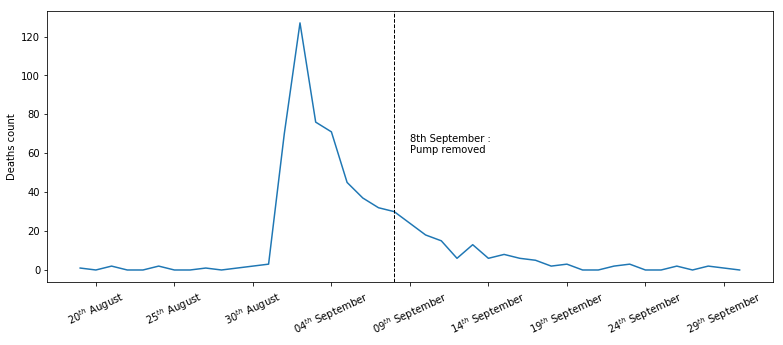

In [11]:
# Plot the daily number of deaths
fig, ax = plt.subplots(figsize=(13, 5))

ax.plot(dates['date'], dates['deaths'])

# Vertical line and text
plt.axvline(x=pump_removed, c='black', lw=1, ls='--')
plt.text(x=pd.to_datetime('1854/9/9'), y=60, 
         s='8th September :\nPump removed')

# Set x ticks
ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=5))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("$%d^{th}$ %B"))

plt.xticks(rotation=25)
plt.ylabel('Deaths count');

From the chart, we can clearly see that the peak of the cholera outbreak happened before removing the handle and it was already in decline before the 8th of September.<br>
This different view on the data is very important because when we compared absolute numbers, it lead us to conclude that removing the handle on Broad Street pump for sure stopped the outbreak, which only partially true.